In [21]:
import numpy as np
import matplotlib.pyplot as plt

def lorenz(x, y, z, sigma=10, rho=28, beta=2.667):
    x_dot = sigma*(y - x)
    y_dot = rho*x - y - x*z
    z_dot = x*y - beta*z
    return x_dot, y_dot, z_dot

In [ ]:
dt = 0.01
num_steps = 2000

In [22]:
xs = np.empty(num_steps + 1)
ys = np.empty(num_steps + 1)
zs = np.empty(num_steps + 1)
        
            
xs[0], ys[0], zs[0] = (0., 1., 1.05)


In [23]:
for i in range(num_steps):
    x_dot, y_dot, z_dot = lorenz(xs[i], ys[i], zs[i])
    xs[i + 1] = xs[i] + (x_dot * dt)
    ys[i + 1] = ys[i] + (y_dot * dt)
    zs[i + 1] = zs[i] + (z_dot * dt)

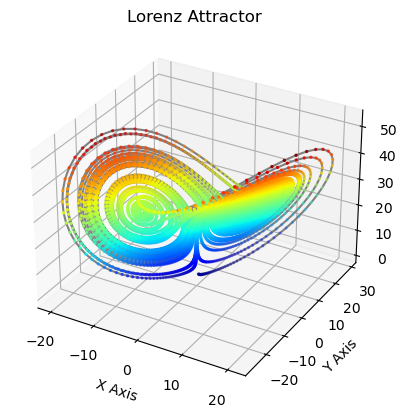

In [24]:
ax = plt.figure().add_subplot(projection='3d')


ax.scatter(xs, ys, zs, s = 2, c = plt.cm.jet(zs/max(zs)))
ax.plot(xs, ys, zs, color = 'grey')
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

plt.show()

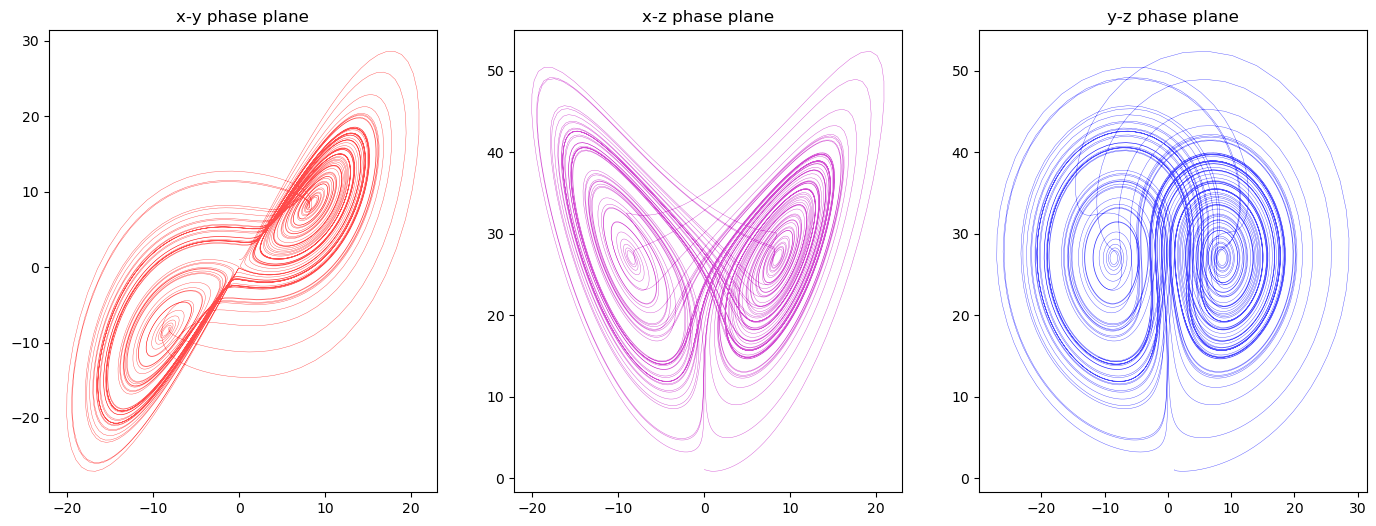

In [25]:
dt = 0.01
num_steps = 10000

fig, ax = plt.subplots(1, 3, sharex=False, sharey=False, figsize=(17, 6))

# plot the x values vs the y values
ax[0].plot(xs, ys, color='r', alpha=0.7, linewidth=0.3)
ax[0].set_title('x-y phase plane')

# plot the x values vs the z values
ax[1].plot(xs, zs, color='m', alpha=0.7, linewidth=0.3)
ax[1].set_title('x-z phase plane')

# plot the y values vs the z values
ax[2].plot(ys, zs, color='b', alpha=0.7, linewidth=0.3)
ax[2].set_title('y-z phase plane')

plt.show()

In [26]:
%matplotlib inline
import numpy as np, matplotlib.pyplot as plt, glob, os
import IPython.display as IPdisplay, matplotlib.font_manager as fm
from scipy.integrate import odeint
from mpl_toolkits.mplot3d.axes3d import Axes3D
from PIL import Image

In [27]:
family = 'Myriad Pro'
title_font = fm.FontProperties(family=family, style='normal', size=20, weight='normal', stretch='normal')

In [28]:
save_folder = 'images/lorenz-animate'
if not os.path.exists(save_folder):
    os.makedirs(save_folder)

In [29]:
initial_state = [0.1, 0, 0]

# sigma, rho, and beta
sigma = 10.
rho   = 28.
beta  = 8./3.

# time points 
start_time = 1
end_time = 60
interval = 100
time_points = np.linspace(start_time, end_time, end_time * interval)

In [30]:
def lorenz_system(current_state, t):
    x, y, z = current_state
    dx_dt = sigma * (y - x)
    dy_dt = x * (rho - z) - y
    dz_dt = x * y - beta * z
    return [dx_dt, dy_dt, dz_dt]



In [38]:
def plot_lorenz(xyz, n):
    fig = plt.figure(figsize=(12, 9))
    ax = fig.add_subplot(projection = '3d')
    ax.xaxis.set_pane_color((1,1,1,1))
    ax.yaxis.set_pane_color((1,1,1,1))
    ax.zaxis.set_pane_color((1,1,1,1))
    x = xyz[:, 0]
    y = xyz[:, 1]
    z = xyz[:, 2]
    ax.plot(x, y, z, color='g', alpha=0.7, linewidth=0.7)
    ax.set_xlim((-30,30))
    ax.set_ylim((-30,30))
    ax.set_zlim((0,50))
    ax.set_title('Lorenz system attractor', fontproperties=title_font)
    
    plt.savefig('{}/{:03d}.png'.format(save_folder, n), dpi=60, bbox_inches='tight', pad_inches=0.1)
    plt.close()
    

In [39]:
def get_chunks(full_list, size):
    size = max(1, size)
    chunks = [full_list[0:i] for i in range(1, len(full_list) + 1, size)]
    return chunks

chunks = get_chunks(time_points, size=20)

# get the points to plot, one chunk of time steps at a time, by integrating the system of equations

points = [odeint(lorenz_system, initial_state, chunk) for chunk in chunks]

# plot each set of points, one at a time, saving each plot

for n, point in enumerate(points):
    plot_lorenz(point, n)

findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro'

In [40]:
first_last = 100 #show the first and last frames for 100 ms
standard_duration = 5 #show all other frames for 5 ms
durations = tuple([first_last] + [standard_duration] * (len(points) - 2) + [first_last])

In [41]:
# load all the static images into a list
images = [Image.open(image) for image in glob.glob('{}/*.png'.format(save_folder))]
gif_filepath = 'images/animated-lorenz-attractor.gif'

In [42]:
gif = images[0]
gif.info['duration'] = durations #ms per frame
gif.info['loop'] = 0 #how many times to loop (0=infinite)
gif.save(fp=gif_filepath, format='gif', save_all=True, append_images=images[1:])


TypeError: unsupported operand type(s) for /: 'tuple' and 'int'

In [ ]:
Image.open(gif_filepath).n_frames == len(images) == len(durations)

In [ ]:
IPdisplay.Image(url=gif_filepath)